# Decision Tree Classification

## Importing the necessary libraries and packages

In [1]:
import matplotlib.pyplot as plt  # data plotting
import numpy as np  # data processing
import pandas as pd  # data processing
from joblib import dump  # saving the model
from sklearn.datasets import load_breast_cancer  # loading the dataset
from sklearn.metrics import (
    ConfusionMatrixDisplay,  # accuracy metrics
    RocCurveDisplay,
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split  # splitting the dataset
from sklearn.tree import (
    DecisionTreeClassifier,  # classification algorithm
    plot_tree,
    export_text,
)

## Importing the csv file as a dataFrame

In [3]:
df = pd.read_csv("../../../../Datasets/SocialNetworkAds.csv")
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


## Exploratory Data Analysis

Formal information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


Description of the dataset

In [5]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,1.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,1.000000,18.000000,15000.000000,0.000000
25%,1.000000,29.750000,43000.000000,0.000000
50%,2.000000,37.000000,70000.000000,0.000000
75%,2.000000,46.000000,88000.000000,1.000000
max,2.000000,60.000000,150000.000000,1.000000


Checking if any null value exists

In [6]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Columns of the dataset

In [7]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Correlations between the variables

In [8]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


## Now taking 2 parts from the dataset
### X: which contains all columns except the <b>target</b> column<br>Y: which contains only the <b>target</b> column

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Split the <b>X</b> and <b>y</b> Dataframes for Test and Training

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Implementation of the Model

In [11]:
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [12]:
# r = export_text(dtc, feature_names=df.feature_names)
# print(r)

AttributeError: 'DataFrame' object has no attribute 'feature_names'

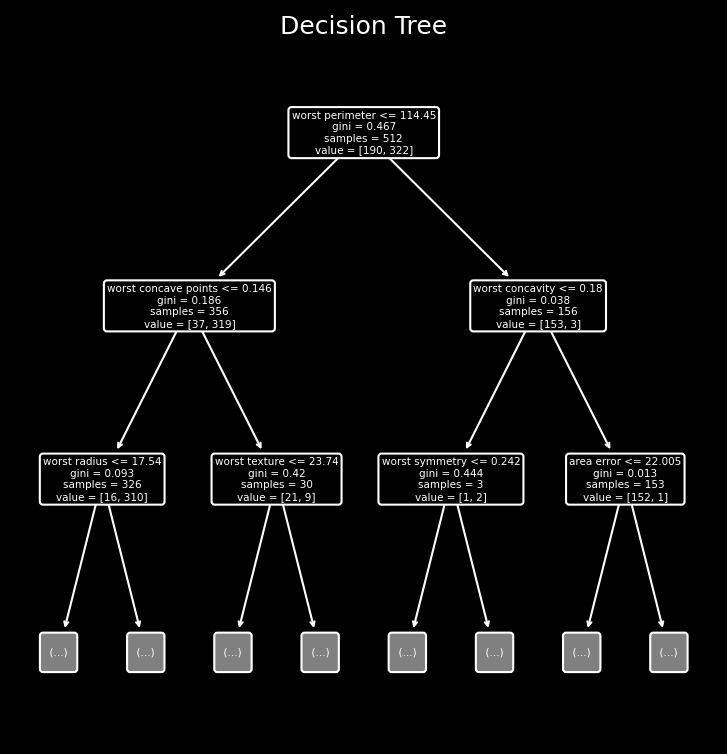

In [19]:
# fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
# plt.style.use('dark_background')
# plot_tree(dtc, ax=ax, max_depth=2, feature_names=breast_cancer.feature_names.tolist(), rounded=True, fontsize=5)
# plt.title('Decision Tree')
# plt.savefig('Images/Decision_Tree.png', bbox_inches='tight')

## Performance of the Model

In [13]:
dtc_con_matrix = confusion_matrix(y_test, y_pred)
dtc_acc = accuracy_score(y_test, y_pred)
print('Confusion Matrix', '\n', dtc_con_matrix, '\n')
print('Accuracy of Decision Tree Classification :', dtc_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred))

Confusion Matrix 
 [[21  1]
 [ 2 33]] 

Accuracy of Decision Tree Classification : 94.73684210526315 

Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.97      0.94      0.96        35

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



## Plotting the Confusion Matrix

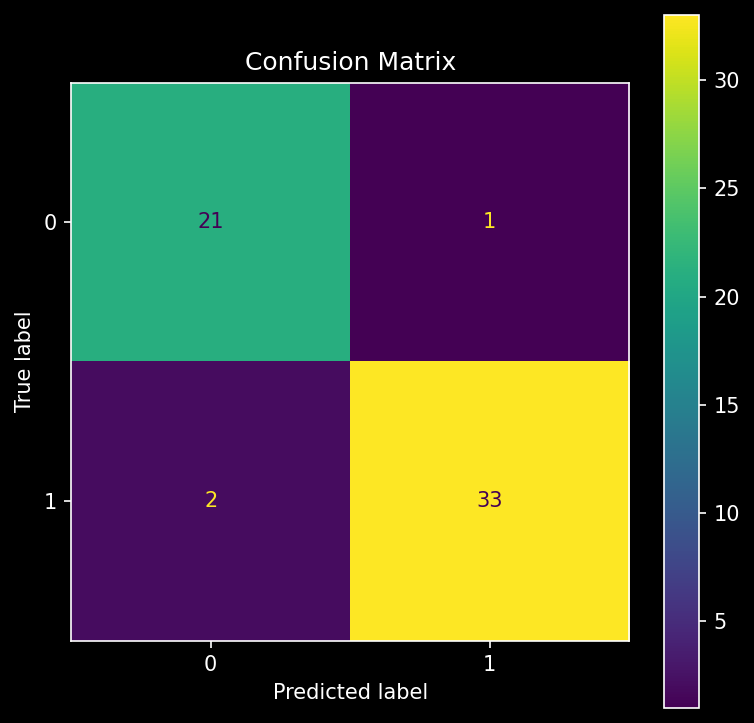

In [14]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
ConfusionMatrixDisplay(dtc_con_matrix).plot(ax=ax)
plt.title('Confusion Matrix')
plt.savefig('Images/Confusion_Matrix_Decision_Tree_Classification.png', bbox_inches='tight')

## Plotting the ROC curve

In [15]:
y_score = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

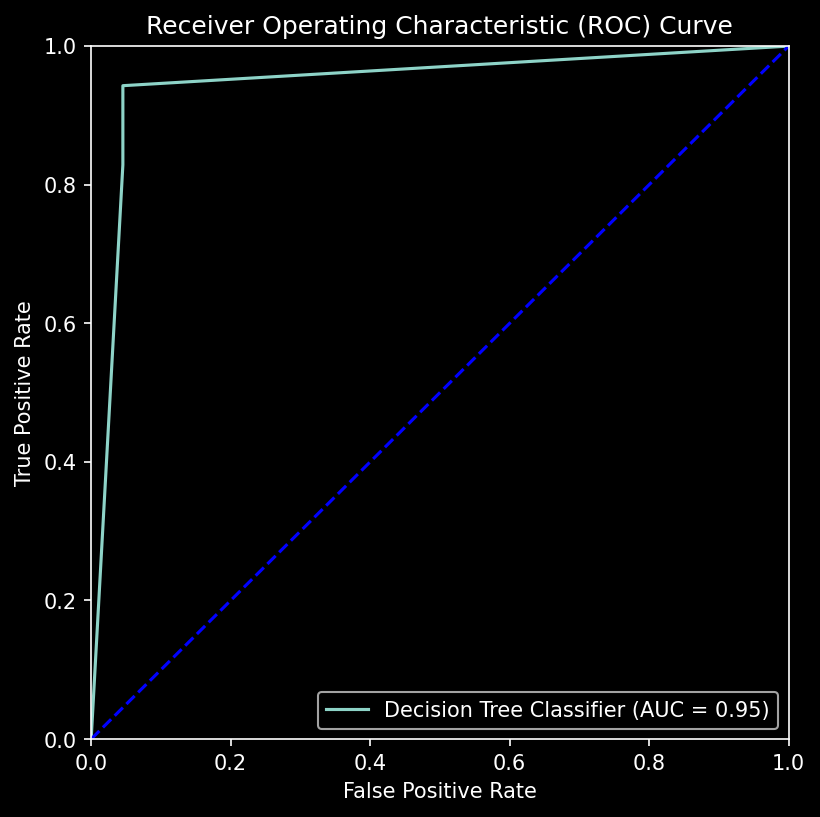

In [16]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree Classifier').plot(ax=ax)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig('Images/ROC_Curve_Decision_Tree_Classification.png', bbox_inches='tight')

## Computing the AUC of ROC

In [17]:
print('Area Under the Receiver Operating Characteristic Curve :', roc_auc_score(y_test, y_score))

Area Under the Receiver Operating Characteristic Curve : 0.9461038961038961


## Saving the model

In [18]:
dump(dtc, 'decisionTreeClassifier.joblib')

['decisionTreeClassifier.joblib']